In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Yoon\Desktop\윤새하\2025-Winter\GitHub\Data Analyst\movie\movies.csv')

In [2]:
# Look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Check missing data

for col in df.columns:
    col_missing=np.mean(df[col].isnull())
    print(col_missing)

0.0
0.010041731872717789
0.0
0.0
0.0002608242044861763
0.0003912363067292645
0.0003912363067292645
0.0
0.0003912363067292645
0.00013041210224308815
0.0003912363067292645
0.2831246739697444
0.02464788732394366
0.002217005738132499
0.0005216484089723526


In [12]:
# Data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [13]:
# Change data type of columns

df['budget']=df['budget'].astype('Int64')
df['gross']=df['gross'].astype('Int64')

In [47]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearReleased
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0


In [48]:
# Create a correct Year column based on released field

df['YearReleased']=df['released'].astype(str).str.extract(r'(\d{4})')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearReleased
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,1705
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1492
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,1771
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,1492
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,1543


In [49]:
df.sort_values(by=['gross'], inplace=False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearReleased
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,NaN
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,NaN
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,NaN
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,NaN
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,NaN


In [21]:
pd.set_option('display.max_rows', None)

In [52]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False).head()

7129    2384
5664    2383
6412    2382
4007    2381
6793    2380
Name: company, dtype: int16

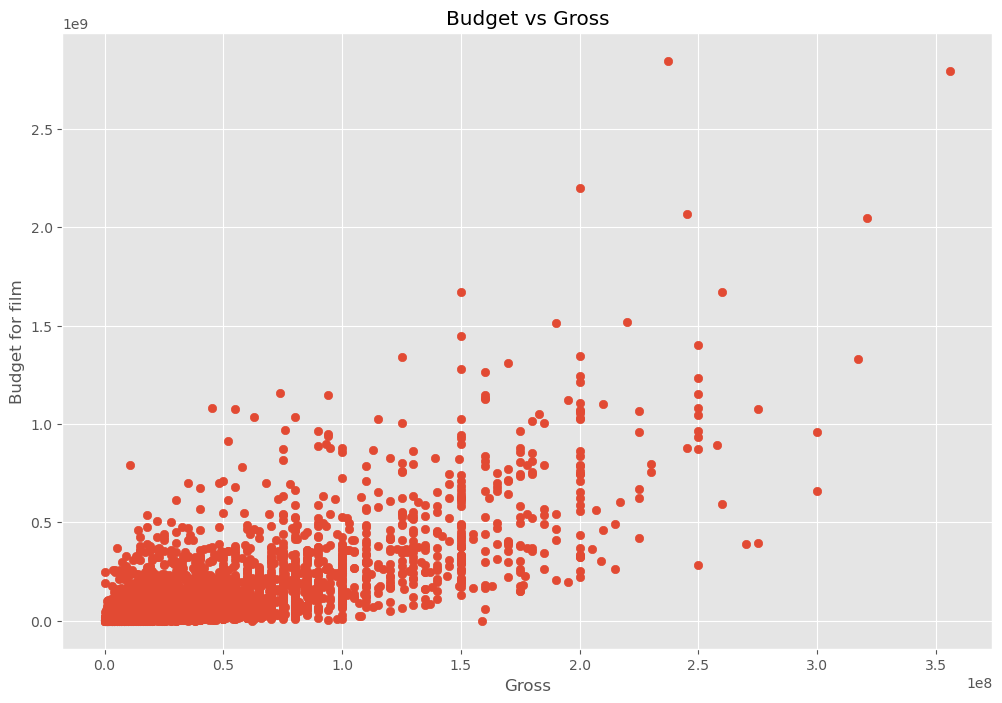

In [27]:
# Build a Scatter Plot with budget - gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Gross')
plt.ylabel('Budget for film')
plt.show()

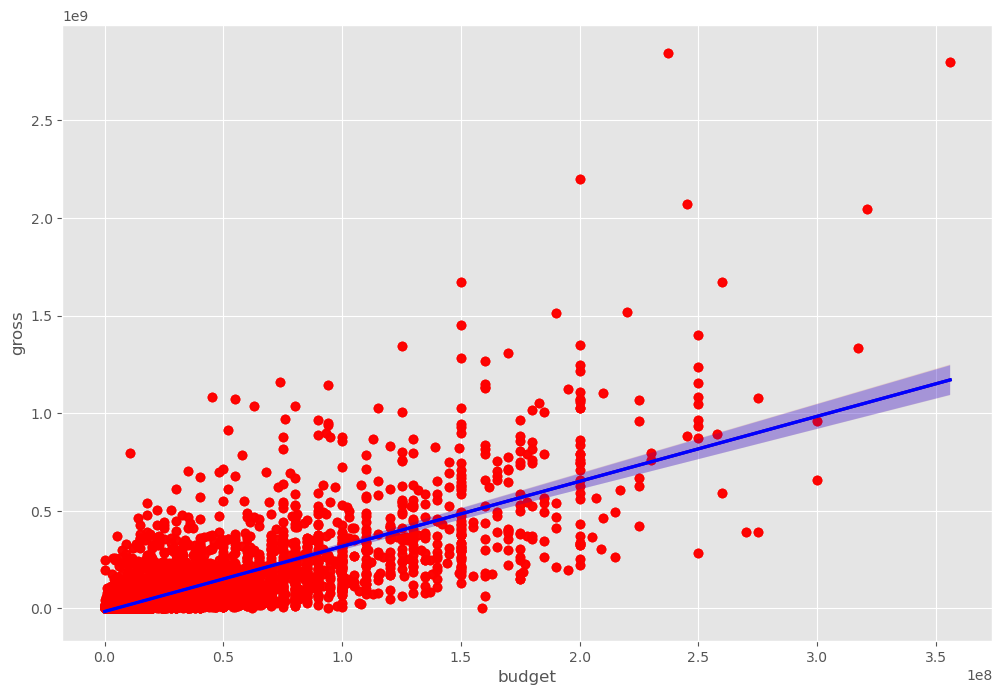

In [30]:
# Plot budget - gross using Seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.show()

In [35]:
# Correlation

df.corr(method='spearman', numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


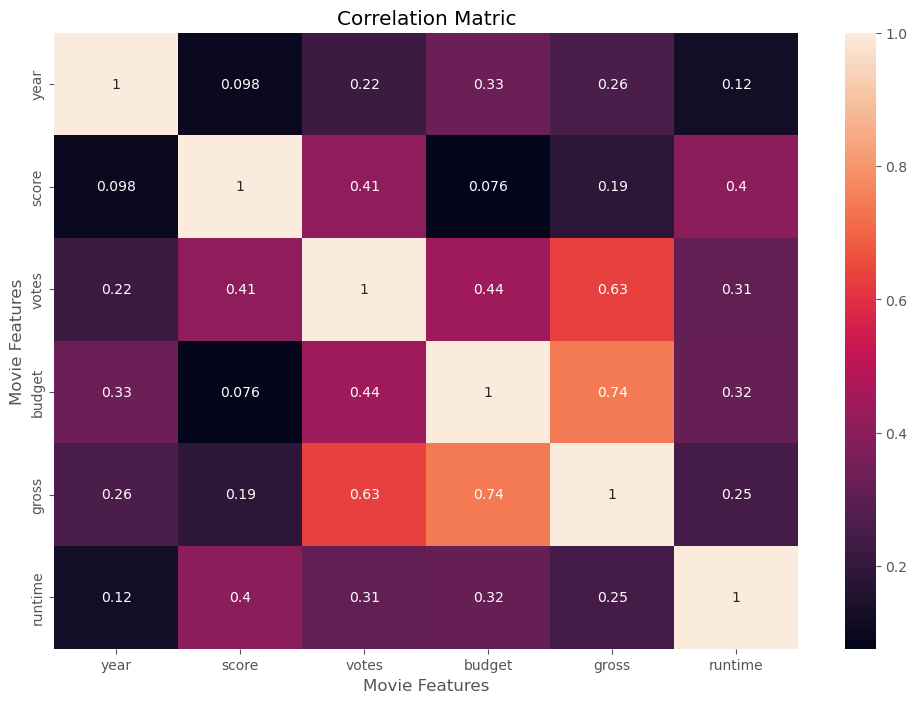

In [38]:
# High Correlation between Budget and Gross
# Visualize Correlation Matrix

correlation_matrix=df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [53]:
# Company Analysis

df_numerized=df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype=='object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name]=df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,YearReleased
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,705
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,492
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,771
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,492
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,543


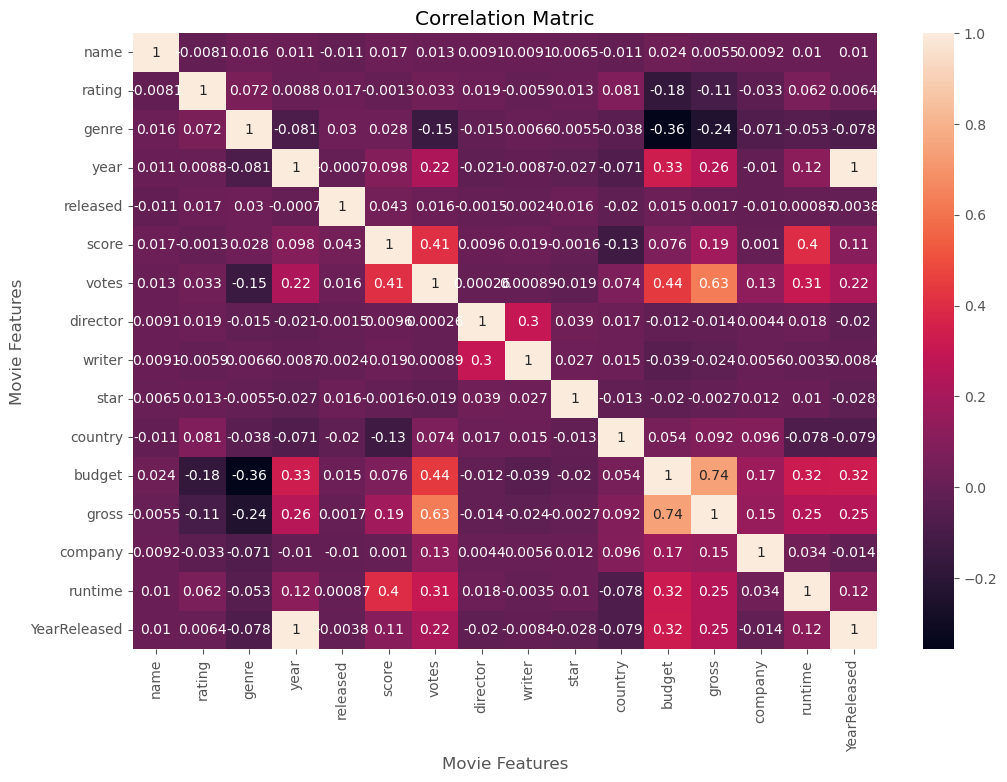

In [41]:
correlation_matrix=df_numerized.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [43]:
correlation_mat=df_numerized.corr()
corr_pairs=correlation_mat.unstack()
corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.017097
              votes           0.013088
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.023970
              gross           0.005533
              company         0.009211
              runtime         0.010392
              YearReleased    0.010225
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score          -0.001314
              votes           0.033225
              director        0.019483
              writer         -0.005921
              star       

In [45]:
sorted_pairs=corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.356564
budget        genre          -0.356564
gross         genre          -0.235650
genre         gross          -0.235650
rating        budget         -0.176002
budget        rating         -0.176002
votes         genre          -0.145307
genre         votes          -0.145307
country       score          -0.133348
score         country        -0.133348
rating        gross          -0.107339
gross         rating         -0.107339
year          genre          -0.081261
genre         year           -0.081261
YearReleased  country        -0.079009
country       YearReleased   -0.079009
              runtime        -0.078412
runtime       country        -0.078412
YearReleased  genre          -0.078210
genre         YearReleased   -0.078210
              company        -0.071067
company       genre          -0.071067
country       year           -0.070938
year          country        -0.070938
genre         runtime        -0.052711
runtime       genre      

In [46]:
high_corr=sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross         votes           0.630757
votes         gross           0.630757
gross         budget          0.740395
budget        gross           0.740395
year          YearReleased    0.996397
YearReleased  year            0.996397
director      director        1.000000
votes         votes           1.000000
released      released        1.000000
score         score           1.000000
rating        rating          1.000000
name          name            1.000000
genre         genre           1.000000
year          year            1.000000
budget        budget          1.000000
country       country         1.000000
writer        writer          1.000000
star          star            1.000000
company       company         1.000000
gross         gross           1.000000
runtime       runtime         1.000000
YearReleased  YearReleased    1.000000
dtype: float64

In [ ]:
# Votes and Budget have the highest correlation to gross earnings!